In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels as sm

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
DATA = data.rename({'YearsExperience':'YE'}, axis=1)

In [4]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YE      30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
DATA.describe()

,YE,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

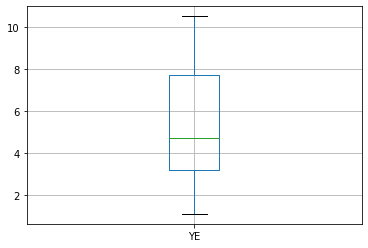

In [6]:
DATA.boxplot(column=['YE'])

<AxesSubplot:>

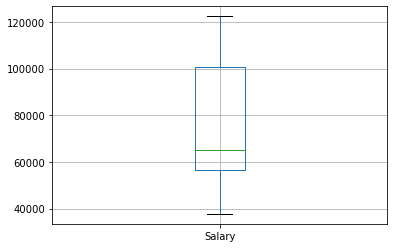

In [7]:
DATA.boxplot(column=['Salary'])

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YE', ylabel='Density'>

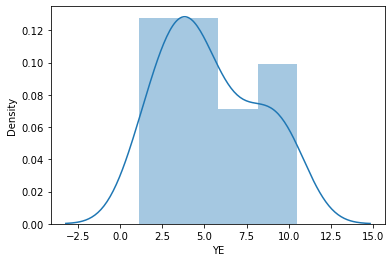

In [8]:
sns.distplot(DATA['YE'])

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

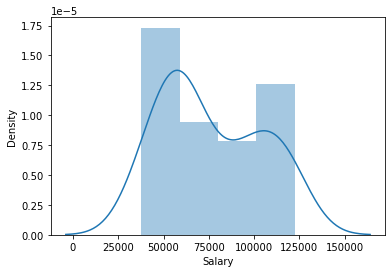

In [9]:
sns.distplot(DATA['Salary'])

In [10]:
DATA.corr()

,YE,Salary
YE,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YE', ylabel='Salary'>

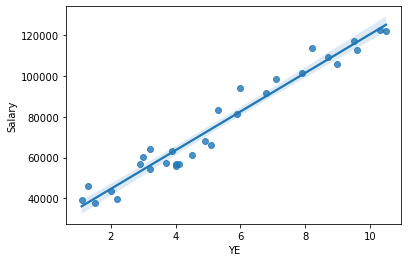

In [11]:
sns.regplot(x =DATA['YE'], y =DATA['Salary'])

In [12]:
model = smf.ols("Salary~YE",data=DATA).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        20:42:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YE          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model.params

Intercept    25792.200199
YE            9449.962321
dtype: float64

In [15]:
model.tvalues , model.pvalues

(Intercept    11.346940
 YE           24.950094
 dtype: float64,
 Intercept    5.511950e-12
 YE           1.143068e-20
 dtype: float64)

In [16]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [17]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [18]:
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['YE'])
data_pred

,YE
0,2
1,6


In [22]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64

Salary hike for 2 years Experience is 44692